In [1]:
#@title # Python Setup { display-mode: "form" }

#@markdown <font color="red"> ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ </font>

#@markdown <font color="red"><h3><b><i> Begin by running this cell.</i></b></h3> </font>

#@markdown <font color="red"> ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ </font>

!pip install exifread &> /dev/null

import os, sys
if 'google.colab' in str(get_ipython()):
  print('Google Colab Environment - Loading Dependencies...')
  !rm -r ImageSTEM imageSTEAM &> /dev/null
  !git clone https://github.com/ImagingLyceum-ASU/ImageSTEAM.git &> /dev/null
  !mv ImageSTEAM/imageSTEAM ./
  !rm -r ImageSTEAM
else:
  print('Local iPython Environment')
  dir1 = os.path.dirname(os.path.abspath('../../'))
  if not dir1 in sys.path: sys.path.append(dir1)

import imageSTEAM as steam
from imageSTEAM import *
print('Environment Ready!')

Google Colab Environment - Loading Dependencies...
Environment Ready!


# **Introduction**

- How does a computer recognize an object?
- What is data?
- What is a neural network?

#  
<font color="red"> %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
</font>

# **Activity: Recognize a dog vs. a cat**

Let's build a machine to detect whether a picture is that of a dog or a cat. This is known as a classifier/classification problem.

In [2]:
# Install
#@title # Download Example Images { display-mode: "form" }

!wget --no-check-certificate \
    https://github.com/saesus/NSF_REU_Colab/blob/main/bin_img_class_dif/dog_pic.zip?raw=true \
    -O /tmp/dog_pic.zip &> /dev/null

!wget --no-check-certificate \
    https://github.com/saesus/NSF_REU_Colab/blob/main/bin_img_class_dif/cat_pic.zip?raw=true \
    -O /tmp/cat_pic.zip &> /dev/null

print("Example images downloaded")

Example images downloaded


**Extract Images**

In [3]:
extract_images()

Example images to choose from:
cat1.jpg
dog3.jpg
cat4.jpg
dog5.jpg
cat5.jpg
dog2.jpg
cat3.jpg
dog4.jpg
dog1.jpg
cat2.jpg


##<font color='red'>Load An Image</font>

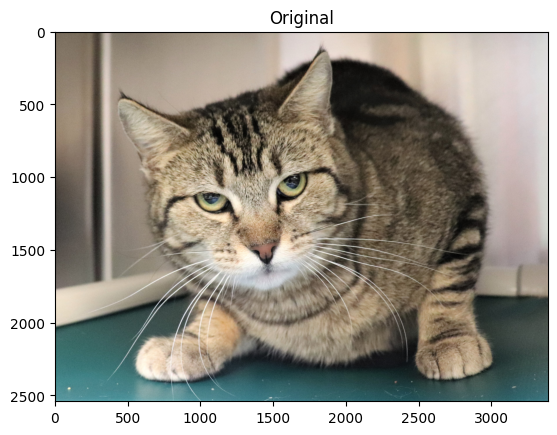

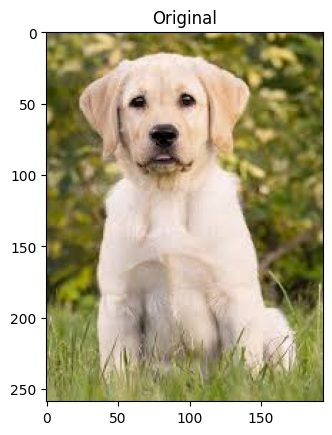

In [4]:
cat = cv2.imread('cat1.jpg')
dog = cv2.imread('dog1.jpg')

display_img(cat)
display_img(dog)

##<font color='red'>Edge Filters</font>

###Sobel Filters

I loaded in the two images for you! They're both saved as grayscale so that the processing is easier. The variable names are "cat" and "dog"

In [5]:
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)

Try filling in the arrays yourself!

In [6]:
sobel_x = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
               [ 0, 0, 0],
               [ 1, 2, 1]])

Let's see what results your arrays produced.

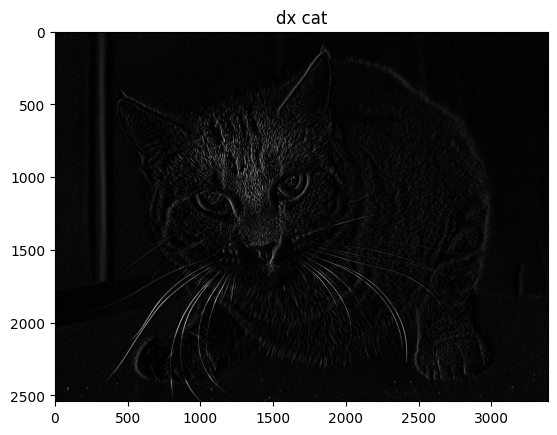

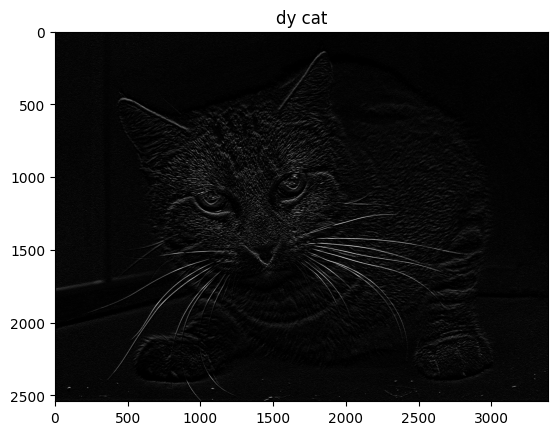

In [7]:
dx_cat = cv2.filter2D(cat, -1, sobel_x)
dy_cat = cv2.filter2D(cat, -1, sobel_y)

display_img(dx_cat, 'dx cat')
display_img(dy_cat, 'dy cat')

### Combining the Derivatives

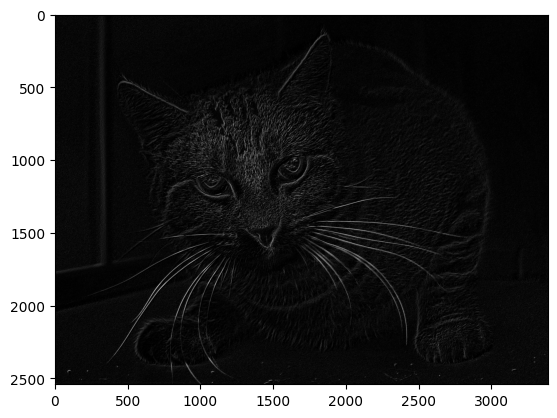

In [8]:
g_cat = approximate_gradient(dx_cat, dy_cat)

### Second Test

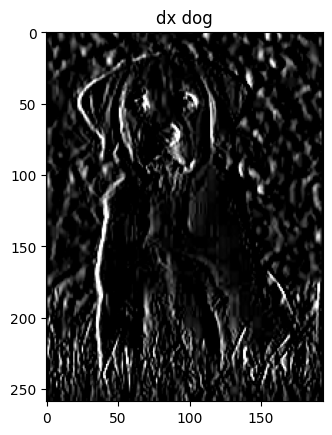

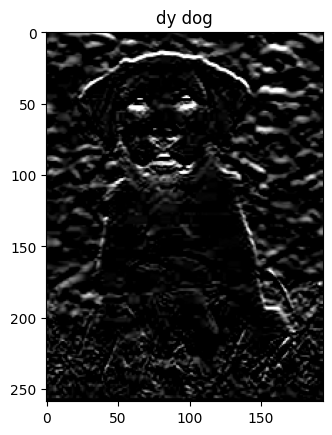

In [9]:
dx_dog = cv2.filter2D(dog, -1, sobel_x)
dy_dog = cv2.filter2D(dog, -1, sobel_y)

display_img(dx_dog, 'dx dog')
display_img(dy_dog, 'dy dog')

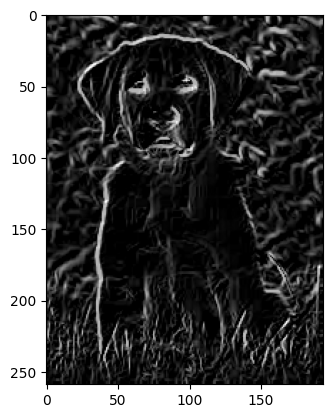

In [10]:
g_dog = approximate_gradient(dx_dog, dy_dog)

##Decision Making

Dot product with a random cat, then a random dog and the image processed above! <br>
Let's see if the new image is a cat or dog when compared to the images that you processed!

The dot product will give the cosine of the angle between the two images, so the larger one will be the classification!

dog4.jpg


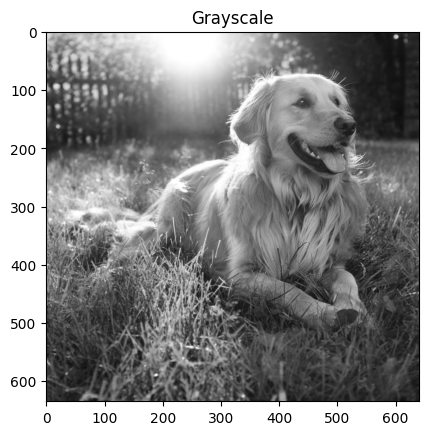

Random dog and dog1 dot product:  115
Random dog and cat1 dot product:  1
It might be a dog


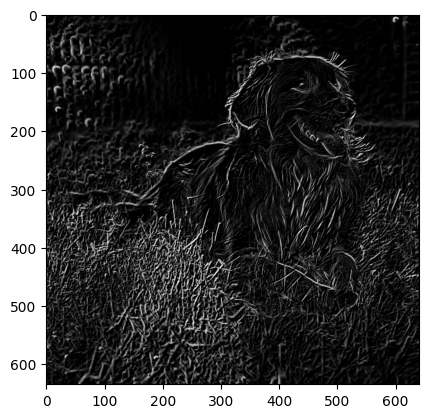

In [27]:
is_it_a_dog(g_dog, g_cat)

cat2.jpg


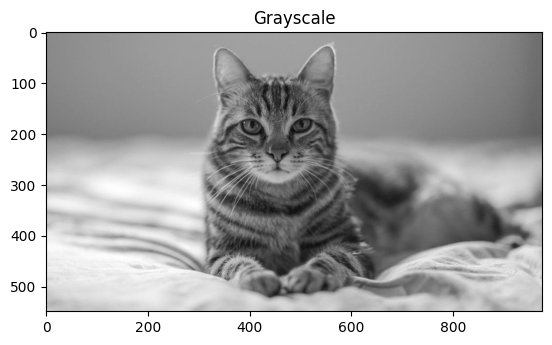

Random cat and cat1 dot product:  85
Random cat and dog1 dot product:  8
It might be a cat


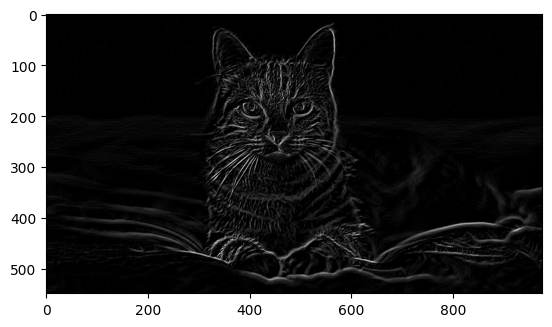

In [28]:
is_it_a_cat(g_cat, g_dog)

If you want to try to do this using neural networks, check out Teachable Machine

# **CODA: Google Teachable Machine**

https://teachablemachine.withgoogle.com/


